# Step 3 - Create TFIDFs for each group to rank terms

The 4 corpora used for TFIDF creation are:
- NMF Abstracts (2015)
- Non-NMF Abstracts (2,224)
- NMF Full Texts (283)
- Non-NMF Full Texts (3497)

## 3.1 - Abstracts NMF Corpus

In [1]:
import functions

In [2]:
functions.outputs.make_csv("/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Assets/Abstracts_TM", "txt")

In [3]:
#csv called corpus.csv saved to current working directory


In [4]:
import pandas as pd
import csv

df=pd.read_csv('corpus.csv', encoding = 'unicode_escape', encoding_errors = 'ignore', engine ='c')
df.head()

,name,text
0,10715976.txt,1. Surgery. 2000 Mar;127(3):245-53. doi: 10.10...
1,10739426.txt,1. Am J Psychiatry. 2000 Apr;157(4):629-31. do...
2,10775545.txt,1. Brain. 2000 May;123 ( Pt 5):1007-16. doi: 1...
3,10815840.txt,1. Brain Inj. 2000 Apr;14(4):319-31. doi: 10.1...
4,10821024.txt,1. Med Sci Law. 2000 Apr;40(2):133-42. doi: 10...


In [5]:
df['processed_text'] = df['text'].apply(functions.processing.preprocess)
df.head()

,name,text,processed_text
0,10715976.txt,1. Surgery. 2000 Mar;127(3):245-53. doi: 10.10...,"[surgery, mar, msyimprovement, information, co..."
1,10739426.txt,1. Am J Psychiatry. 2000 Apr;157(4):629-31. do...,"[psychiatry, apr, appiajpposttraumatic, stress..."
2,10775545.txt,1. Brain. 2000 May;123 ( Pt 5):1007-16. doi: 1...,"[brain, brainauditory, evoke, potential, spect..."
3,10815840.txt,1. Brain Inj. 2000 Apr;14(4):319-31. doi: 10.1...,"[brain, inj, apr, early, indication, emergence..."
4,10821024.txt,1. Med Sci Law. 2000 Apr;40(2):133-42. doi: 10...,"[med, sci, law, apr, near, pvs, new, medicoleg..."


In [6]:
df["word_count"] = df["processed_text"].apply(lambda x: len(x))
#add in a line to remove 0 wc texts
df = df[~(df.word_count == 0)]


df.head()

,name,text,processed_text,word_count
0,10715976.txt,1. Surgery. 2000 Mar;127(3):245-53. doi: 10.10...,"[surgery, mar, msyimprovement, information, co...",163
1,10739426.txt,1. Am J Psychiatry. 2000 Apr;157(4):629-31. do...,"[psychiatry, apr, appiajpposttraumatic, stress...",104
2,10775545.txt,1. Brain. 2000 May;123 ( Pt 5):1007-16. doi: 1...,"[brain, brainauditory, evoke, potential, spect...",247
3,10815840.txt,1. Brain Inj. 2000 Apr;14(4):319-31. doi: 10.1...,"[brain, inj, apr, early, indication, emergence...",104
4,10821024.txt,1. Med Sci Law. 2000 Apr;40(2):133-42. doi: 10...,"[med, sci, law, apr, near, pvs, new, medicoleg...",107


In [7]:
# Descriptive statistics for word count
df['word_count'].describe()
#95%CI Calculated: 

count    2015.000000
mean      176.629777
std        69.933213
min        11.000000
25%       135.000000
50%       173.000000
75%       214.000000
max       980.000000
Name: word_count, dtype: float64

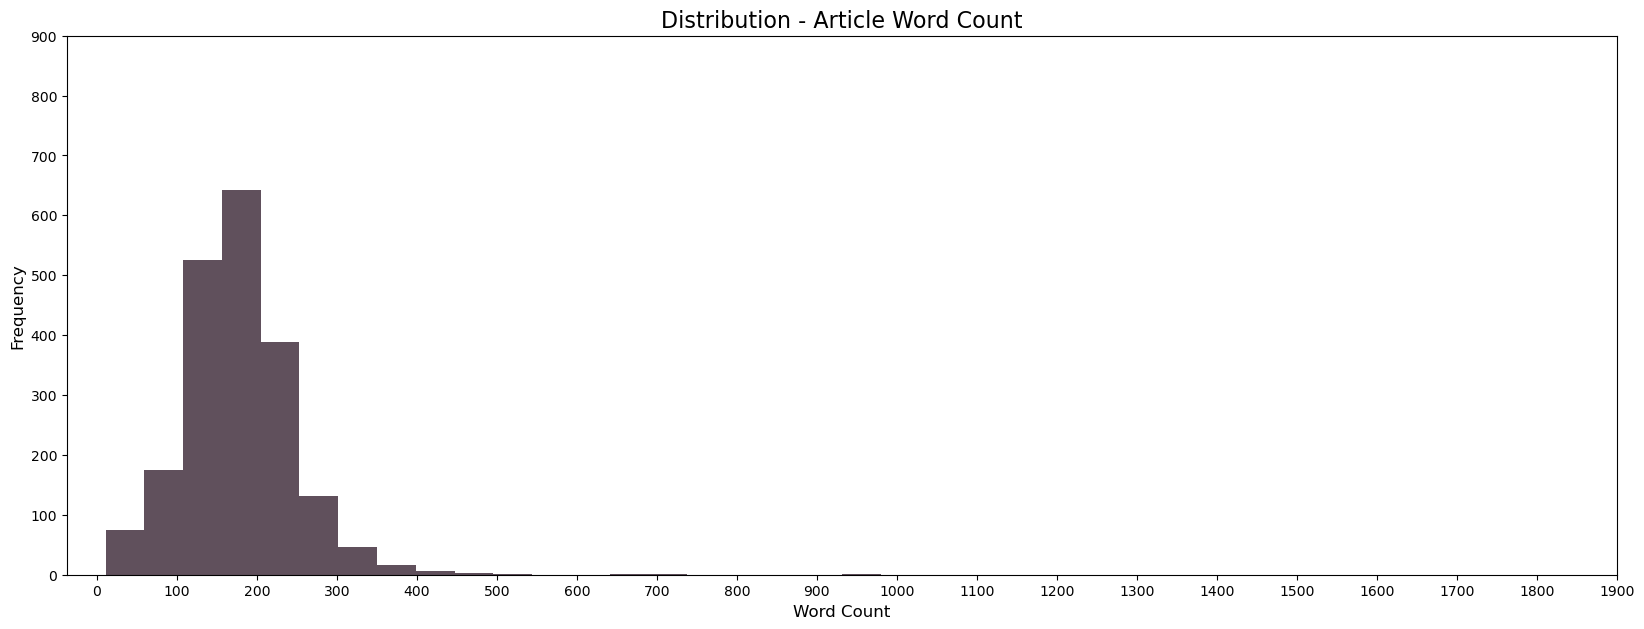

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Plot a hist of the word counts
fig = plt.figure(figsize=(20,7))

plt.hist(
    df['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 1000, 100))
plt.xticks(np.arange(0, 2000, 100))

file_name = 'hist'

plt.show()

In [9]:
from collections import Counter

# Get the top 20 most common words among all the articles
p_text = df['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,patient,8527
1,brain,4458
2,injury,3754
3,consciousness,3427
4,university,3227
5,state,2697
6,study,2367
7,disorder,1780
8,clinical,1686
9,hospital,1619


In [10]:
# Get the number of unique words after processing
num_unique_words = len(set(p_text))
num_unique_words

32458

In [11]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# create a dataframe with the text data
df['string_text'] = df["processed_text"].apply(lambda x: ' '.join(x))


df.head()

# create the TfidfVectorizer object
vectorizer = TfidfVectorizer()

# fit the vectorizer to the data and transform the data
tfidf_scores = vectorizer.fit_transform(df['string_text'])

# get the feature names
feature_names = vectorizer.get_feature_names()

# create a dataframe with the tf-idf scores
tfidf_df = pd.DataFrame(tfidf_scores.toarray(), columns=feature_names)

In [13]:
# calculate the mean tf-idf value for each word across the corpus
mean_tfidf = tfidf_df.mean()

# sort the mean tf-idf values in descending order
mean_tfidf = mean_tfidf.sort_values(ascending=False)

# view the top 10 most important words
print(mean_tfidf.head(10))

patient          0.061370
brain            0.033553
injury           0.032852
consciousness    0.028213
state            0.027291
university       0.024918
tbi              0.022382
mcs              0.021498
study            0.019522
doc              0.019477
dtype: float64


In [14]:
dict_path = "/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Dictionaries/aalbi_dictionary.txt"
dictionary = []
dictionary = functions.os_level.makedict(dict_path)
dictionary

['precentral_gyrus',
 'frontal_sup',
 'frontal_mid',
 'frontal_inf_oper',
 'frontal_inf_tri',
 'frontal_inf_orb',
 'rolandic_oper',
 'supp_motor_area',
 'olfactory_cortex',
 'frontal_sup_medial',
 'frontal_med_orb',
 'gyrus_rectus',
 'ofcmed',
 'ofcant',
 'ofcpost',
 'ofclat',
 'insular_cortex',
 'cingulate_ant',
 'cingulate_mid',
 'cingulate_post',
 'hippocampus',
 'parahippocampal',
 'amygdala',
 'calcarine',
 'cuneus',
 'lingual_gyrus',
 'occipital_sup',
 'occipital_mid',
 'occipital_inf',
 'fusiform',
 'postcentral',
 'parietal_sup',
 'parietal_inf',
 'supramarginal',
 'angular_gyrus',
 'precuneus',
 'paracentral_lobule',
 'caudate',
 'putamen',
 'pallidum',
 'thalamus',
 'heschl',
 'temporal_sup',
 'temporal_pole_sup',
 'temporal_mid',
 'temporal_pole_mid',
 'temporal_inf',
 'cerebellum_crus',
 'cerebellum_aal',
 'vermis']

In [15]:
# create a list
my_list = dictionary

# create a set of items to remove from the list
remove_set = set(['angular_gyrus', 'frontal_sup_medial', 'frontal_inf_orb', 'ofcmed', 'lingual_gyrus', 'cerebellum_crus', 'occipital_sup', 'frontal_med_orb', 'frontal_inf_oper', 'ofcant', 'olfactory_cortex', 'precentral_gyrus', 'ofcpost', 'ofclat', 'occipital_inf', 'heschl', 'temporal_pole_mid', 'frontal_inf_tri', 'insular_cortex', 'gyrus_rectus'])

# convert the list to a set and use the difference() method to remove the items
my_list = list(set(my_list).difference(remove_set))

# view the resulting list
print(my_list)

['frontal_sup', 'putamen', 'parietal_sup', 'calcarine', 'supp_motor_area', 'cuneus', 'vermis', 'temporal_inf', 'caudate', 'paracentral_lobule', 'cingulate_post', 'fusiform', 'parietal_inf', 'hippocampus', 'rolandic_oper', 'frontal_mid', 'amygdala', 'thalamus', 'temporal_mid', 'pallidum', 'occipital_mid', 'temporal_sup', 'temporal_pole_sup', 'precuneus', 'cingulate_ant', 'postcentral', 'supramarginal', 'cingulate_mid', 'cerebellum_aal', 'parahippocampal']


In [16]:
# create a list of the words to find the mean tf-idf values for
words = my_list

# calculate the mean tf-idf value for each word in the list
mean2_tfidf = tfidf_df[words].mean()

# sort the mean tf-idf values in descending order
mean2_tfidf = mean2_tfidf.sort_values(ascending=False)

# view the top 10 most important words
print(mean2_tfidf.head(10))

thalamus          0.003456
precuneus         0.001295
cingulate_ant     0.000960
cingulate_post    0.000803
hippocampus       0.000643
cerebellum_aal    0.000556
amygdala          0.000379
caudate           0.000341
temporal_sup      0.000303
frontal_mid       0.000250
dtype: float64


This is an analysis and TFIDF of the most common terms to appear in the Abstracts NMF Corpus

## 3.2 - Abstracts Non-NMF Corpus

In [1]:
import functions

In [2]:
functions.outputs.make_csv("/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Assets/Abstracts_NON_TM", "txt")

In [3]:
#csv called corpus.csv saved to current working directory

In [4]:
import pandas as pd
import csv

df=pd.read_csv('corpus.csv', encoding = 'unicode_escape', encoding_errors = 'ignore', engine ='c')
df.head()

,name,text
0,10601807.txt,1. Eur Neurol. 2000;43(1):39-46. doi: 10.1159/...
1,10613939.txt,1. Ann Emerg Med. 2000 Jan;35(1):43-6. doi: 10...
2,10618329.txt,1. Heart. 2000 Jan;83(1):22-3. doi: 10.1136/he...
3,10618330.txt,1. Heart. 2000 Jan;83(1):24-8. doi: 10.1136/he...
4,10624990.txt,1. Anesth Analg. 2000 Jan;90(1):116-8. doi: 10...


In [5]:
df['processed_text'] = df['text'].apply(functions.processing.preprocess)
df.head()

,name,text,processed_text
0,10601807.txt,1. Eur Neurol. 2000;43(1):39-46. doi: 10.1159/...,"[eur, neurol, simultaneous, assessment, brain,..."
1,10613939.txt,1. Ann Emerg Med. 2000 Jan;35(1):43-6. doi: 10...,"[ann, emerg, med, jan, sxhypoglycemia, abcs, s..."
2,10618329.txt,1. Heart. 2000 Jan;83(1):22-3. doi: 10.1136/he...,"[heart, jan, heartdiagnosis, carotid, sinus, h..."
3,10618330.txt,1. Heart. 2000 Jan;83(1):24-8. doi: 10.1136/he...,"[heart, jan, heartclinical, features, adenosin..."
4,10624990.txt,1. Anesth Analg. 2000 Jan;90(1):116-8. doi: 10...,"[anesth, analg, jan, prolong, coma, quadripleg..."


In [6]:
df["word_count"] = df["processed_text"].apply(lambda x: len(x))
#add in a line to remove 0 wc texts
df = df[~(df.word_count == 0)]


df.head()

,name,text,processed_text,word_count
0,10601807.txt,1. Eur Neurol. 2000;43(1):39-46. doi: 10.1159/...,"[eur, neurol, simultaneous, assessment, brain,...",133
1,10613939.txt,1. Ann Emerg Med. 2000 Jan;35(1):43-6. doi: 10...,"[ann, emerg, med, jan, sxhypoglycemia, abcs, s...",163
2,10618329.txt,1. Heart. 2000 Jan;83(1):22-3. doi: 10.1136/he...,"[heart, jan, heartdiagnosis, carotid, sinus, h...",170
3,10618330.txt,1. Heart. 2000 Jan;83(1):24-8. doi: 10.1136/he...,"[heart, jan, heartclinical, features, adenosin...",203
4,10624990.txt,1. Anesth Analg. 2000 Jan;90(1):116-8. doi: 10...,"[anesth, analg, jan, prolong, coma, quadripleg...",30


In [7]:
# Descriptive statistics for word count
df['word_count'].describe()
#95%CI Calculated: 

count    21695.000000
mean       128.227472
std         90.178313
min          7.000000
25%         50.000000
50%        129.000000
75%        180.500000
max       2631.000000
Name: word_count, dtype: float64

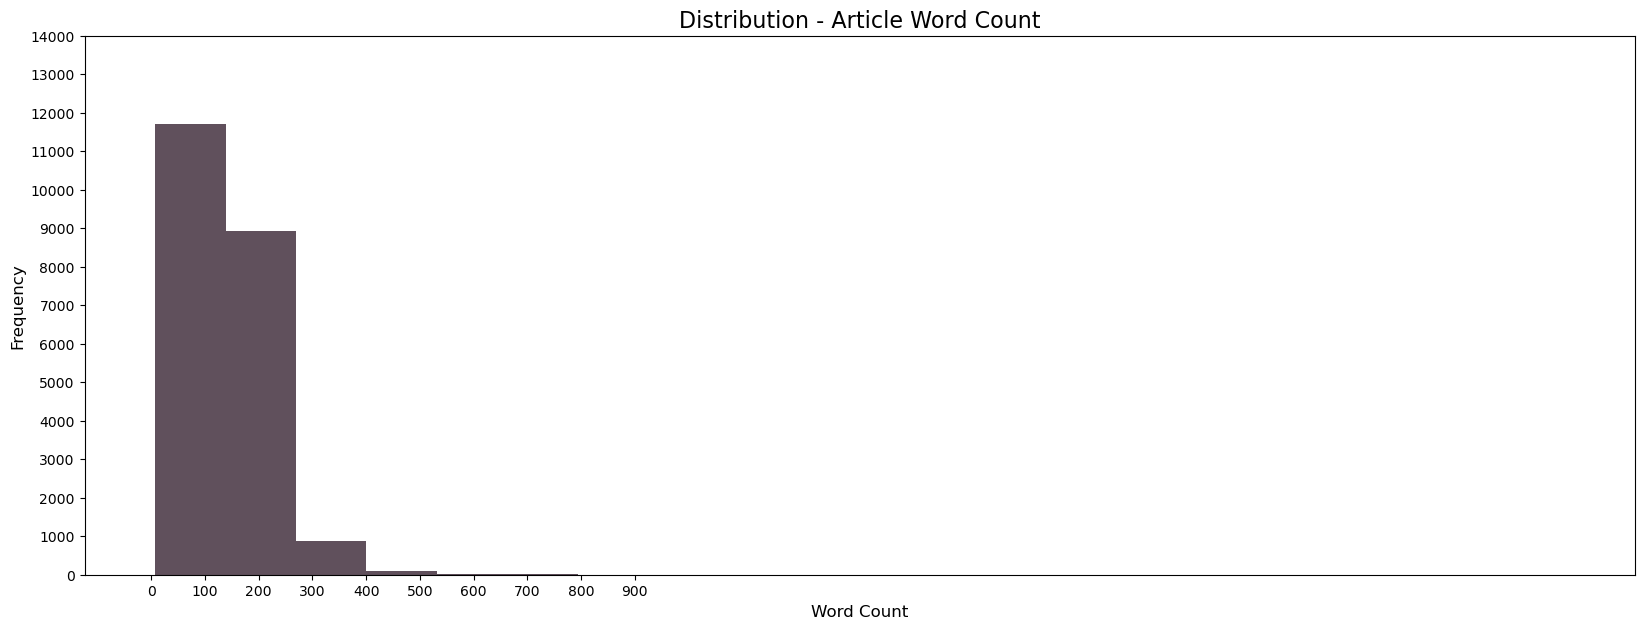

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Plot a hist of the word counts
fig = plt.figure(figsize=(20,7))

plt.hist(
    df['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 15000, 1000))
plt.xticks(np.arange(0, 1000, 100))

file_name = 'hist'

plt.show()

In [12]:
from collections import Counter

# Get the top 20 most common words among all the articles
p_text = df['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,patient,46198
1,university,26403
2,medline,19189
3,hospital,18182
4,syncope,15493
5,medicine,14670
6,brain,14347
7,study,13869
8,medical,13352
9,indexed,11686


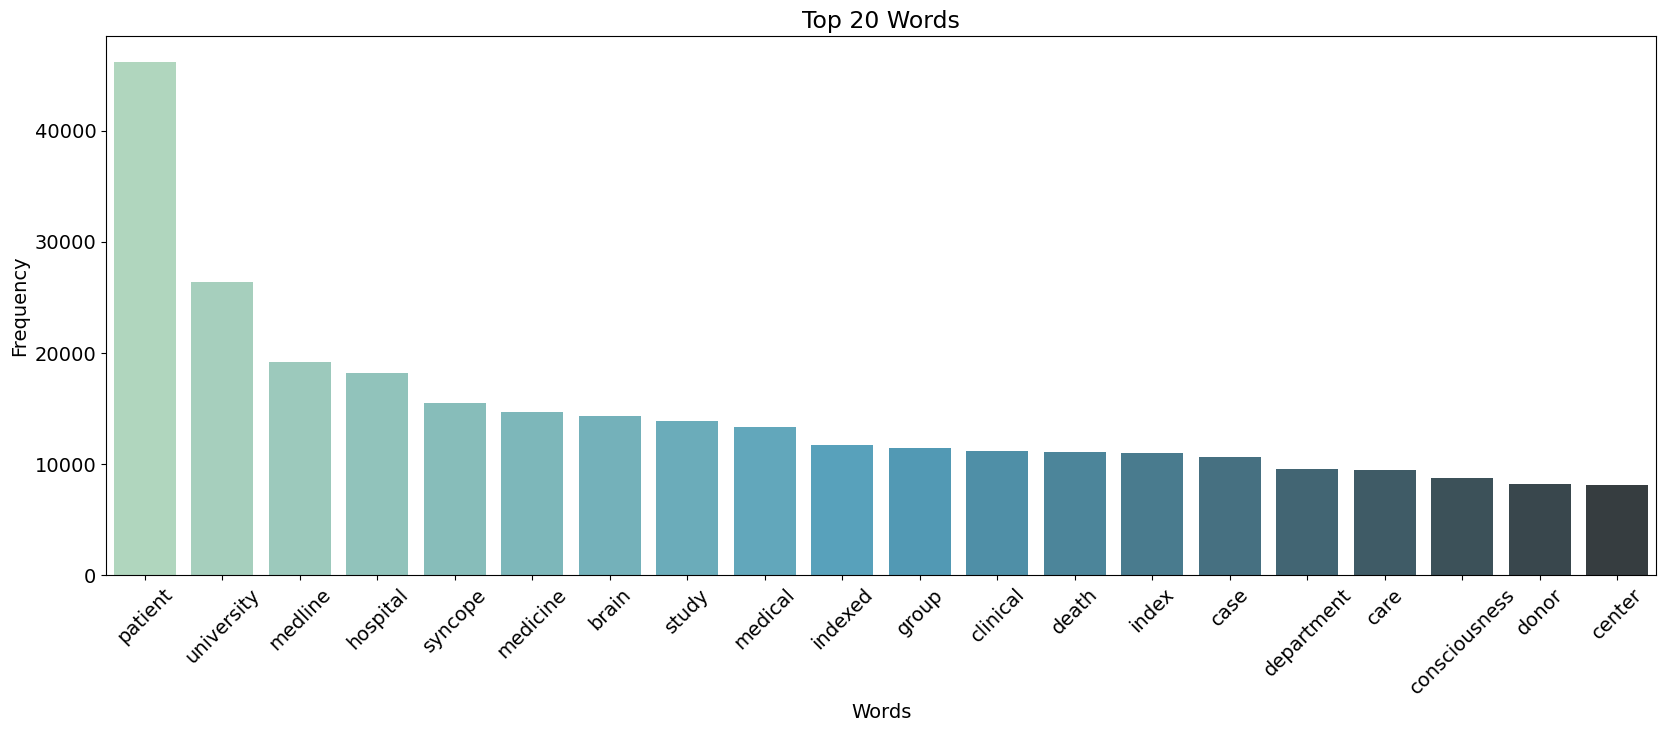

In [13]:
import seaborn as sns

# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)

plt.show()

In [14]:
# Get the number of unique words after processing
num_unique_words = len(set(p_text))
num_unique_words

189607

In [15]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# create a dataframe with the text data
df['string_text'] = df["processed_text"].apply(lambda x: ' '.join(x))


df.head()

# create the TfidfVectorizer object
vectorizer = TfidfVectorizer()

# fit the vectorizer to the data and transform the data
tfidf_scores = vectorizer.fit_transform(df['string_text'])

# get the feature names
feature_names = vectorizer.get_feature_names()

# create a dataframe with the tf-idf scores
tfidf_df = pd.DataFrame(tfidf_scores.toarray(), columns=feature_names)

In [17]:
# calculate the mean tf-idf value for each word across the corpus
mean_tfidf = tfidf_df.mean()

# sort the mean tf-idf values in descending order
mean_tfidf = mean_tfidf.sort_values(ascending=False)

# view the top 10 most important words
print(mean_tfidf.head(10))

patient       0.034821
syncope       0.021048
university    0.019679
medline       0.016924
brain         0.016628
hospital      0.016371
medicine      0.015327
death         0.015195
indexed       0.014661
medical       0.013887
dtype: float64


In [19]:
dict_path = "/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Dictionaries/aalbi_dictionary.txt"
dictionary = []
dictionary = functions.os_level.makedict(dict_path)
dictionary

['precentral_gyrus',
 'frontal_sup',
 'frontal_mid',
 'frontal_inf_oper',
 'frontal_inf_tri',
 'frontal_inf_orb',
 'rolandic_oper',
 'supp_motor_area',
 'olfactory_cortex',
 'frontal_sup_medial',
 'frontal_med_orb',
 'gyrus_rectus',
 'ofcmed',
 'ofcant',
 'ofcpost',
 'ofclat',
 'insular_cortex',
 'cingulate_ant',
 'cingulate_mid',
 'cingulate_post',
 'hippocampus',
 'parahippocampal',
 'amygdala',
 'calcarine',
 'cuneus',
 'lingual_gyrus',
 'occipital_sup',
 'occipital_mid',
 'occipital_inf',
 'fusiform',
 'postcentral',
 'parietal_sup',
 'parietal_inf',
 'supramarginal',
 'angular_gyrus',
 'precuneus',
 'paracentral_lobule',
 'caudate',
 'putamen',
 'pallidum',
 'thalamus',
 'heschl',
 'temporal_sup',
 'temporal_pole_sup',
 'temporal_mid',
 'temporal_pole_mid',
 'temporal_inf',
 'cerebellum_crus',
 'cerebellum_aal',
 'vermis']

In [24]:
# create a list
my_list = dictionary

# create a set of items to remove from the list
remove_set = set(['ofcpost', 'precentral_gyrus', 'frontal_med_orb', 'angular_gyrus', 'frontal_sup_medial', 'heschl', 'cerebellum_crus', 'olfactory_cortex', 'ofcmed', 'occipital_sup', 'ofcant', 'lingual_gyrus', 'frontal_inf_orb', 'insular_cortex', 'temporal_pole_mid', 'gyrus_rectus'])

# convert the list to a set and use the difference() method to remove the items
my_list = list(set(my_list).difference(remove_set))

# view the resulting list
print(my_list)

['cingulate_post', 'frontal_mid', 'occipital_mid', 'cingulate_mid', 'precuneus', 'paracentral_lobule', 'putamen', 'frontal_inf_tri', 'occipital_inf', 'parietal_sup', 'parahippocampal', 'supp_motor_area', 'cerebellum_aal', 'frontal_inf_oper', 'frontal_sup', 'temporal_pole_sup', 'amygdala', 'caudate', 'calcarine', 'ofclat', 'temporal_mid', 'thalamus', 'temporal_sup', 'pallidum', 'hippocampus', 'fusiform', 'rolandic_oper', 'parietal_inf', 'vermis', 'postcentral', 'cingulate_ant', 'temporal_inf', 'supramarginal', 'cuneus']


In [25]:
# create a list of the words to find the mean tf-idf values for
words = my_list

# calculate the mean tf-idf value for each word in the list
mean2_tfidf = tfidf_df[words].mean()

# sort the mean tf-idf values in descending order
mean2_tfidf = mean2_tfidf.sort_values(ascending=False)

# view the top 10 most important words
print(mean2_tfidf.head(10))

thalamus          0.000664
cerebellum_aal    0.000366
hippocampus       0.000309
amygdala          0.000214
caudate           0.000139
cingulate_ant     0.000123
precuneus         0.000116
cingulate_post    0.000107
fusiform          0.000077
temporal_sup      0.000059
dtype: float64


## 3.3 - Full Texts NMF Corpus

In [1]:
import functions

In [2]:
functions.outputs.make_csv("/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Assets/FullTexts_TM", "txt")

In [3]:
#csv called corpus.csv saved to current working directory

In [5]:
import pandas as pd
import csv

df=pd.read_csv('corpus.csv', encoding = 'unicode_escape', encoding_errors = 'ignore', engine ='c')
df

,name,text
0,10663515.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
1,11178221.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
2,11354230.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
3,12174559.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
4,12566553.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
...,...,...
278,36593347.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
279,36648968.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
280,36653881.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
281,36724523.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...


In [6]:
df['processed_text'] = df['text'].apply(functions.processing.preprocess)
df.head()

,name,text,processed_text
0,10663515.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[receive, january, accept, july, barne, robson..."
1,11178221.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[primary, researchcommentaryreviewreportsmeete..."
2,11354230.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[letter, tothe, editorfirework, related, injur..."
3,12174559.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[battlefield, advanced, trauma, life, support,..."
4,12566553.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[original, articlepupillary, evaluation, diffe..."


In [7]:
df["word_count"] = df["processed_text"].apply(lambda x: len(x))
#add in a line to remove 0 wc texts
df = df[~(df.word_count == 0)]


df.head()

,name,text,processed_text,word_count
0,10663515.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[receive, january, accept, july, barne, robson...",2275
1,11178221.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[primary, researchcommentaryreviewreportsmeete...",1566
2,11354230.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[letter, tothe, editorfirework, related, injur...",2036
3,12174559.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[battlefield, advanced, trauma, life, support,...",1887
4,12566553.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[original, articlepupillary, evaluation, diffe...",1094


In [8]:
# Descriptive statistics for word count
df['word_count'].describe()
#95%CI Calculated: 

count     283.000000
mean     2894.855124
std      1515.085611
min       193.000000
25%      1884.000000
50%      2631.000000
75%      3738.500000
max      8509.000000
Name: word_count, dtype: float64

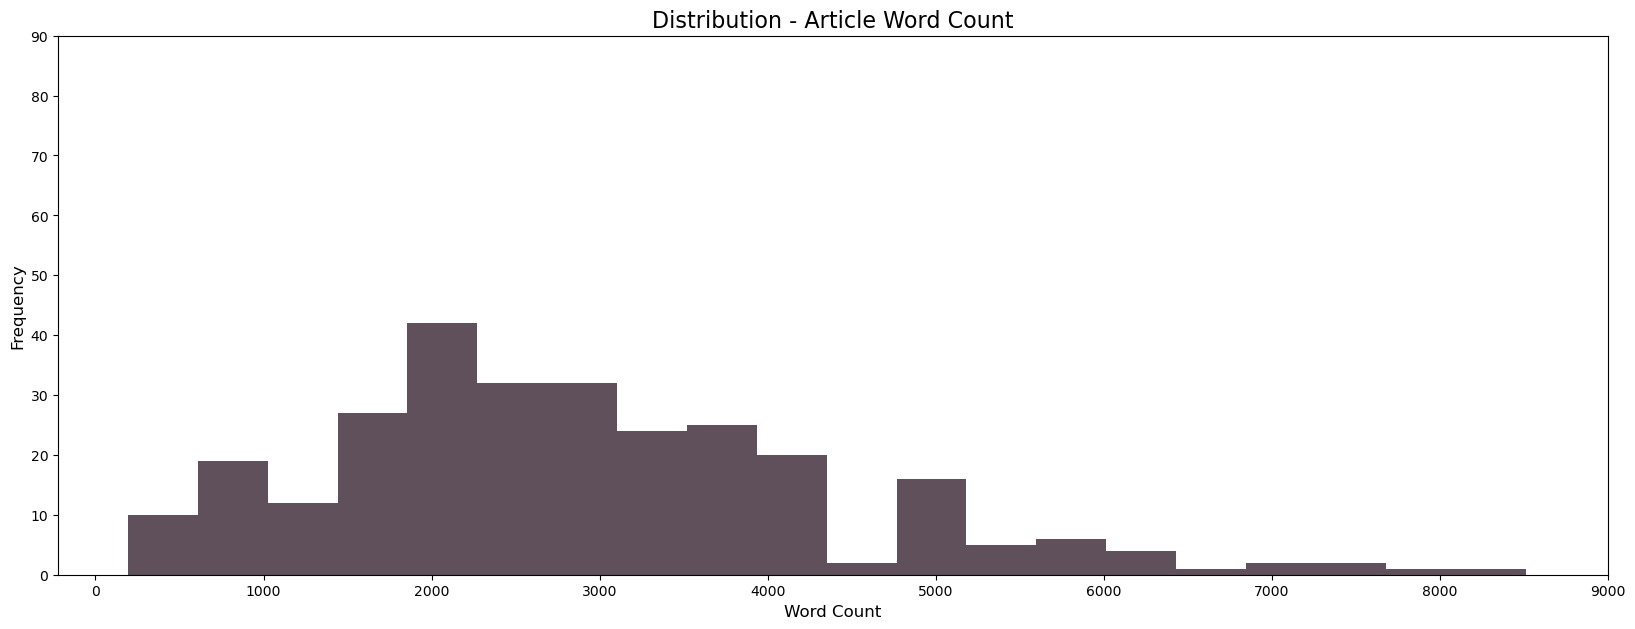

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Plot a hist of the word counts
fig = plt.figure(figsize=(20,7))

plt.hist(
    df['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 100, 10))
plt.xticks(np.arange(0, 10000, 1000))

file_name = 'hist'

plt.show()

In [14]:
from collections import Counter

# Get the top 20 most common words among all the articles
p_text = df['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,patient,12265
1,brain,7291
2,study,6057
3,injury,4660
4,consciousness,4433
5,network,4025
6,score,4009
7,connectivity,3430
8,state,3382
9,functional,3139


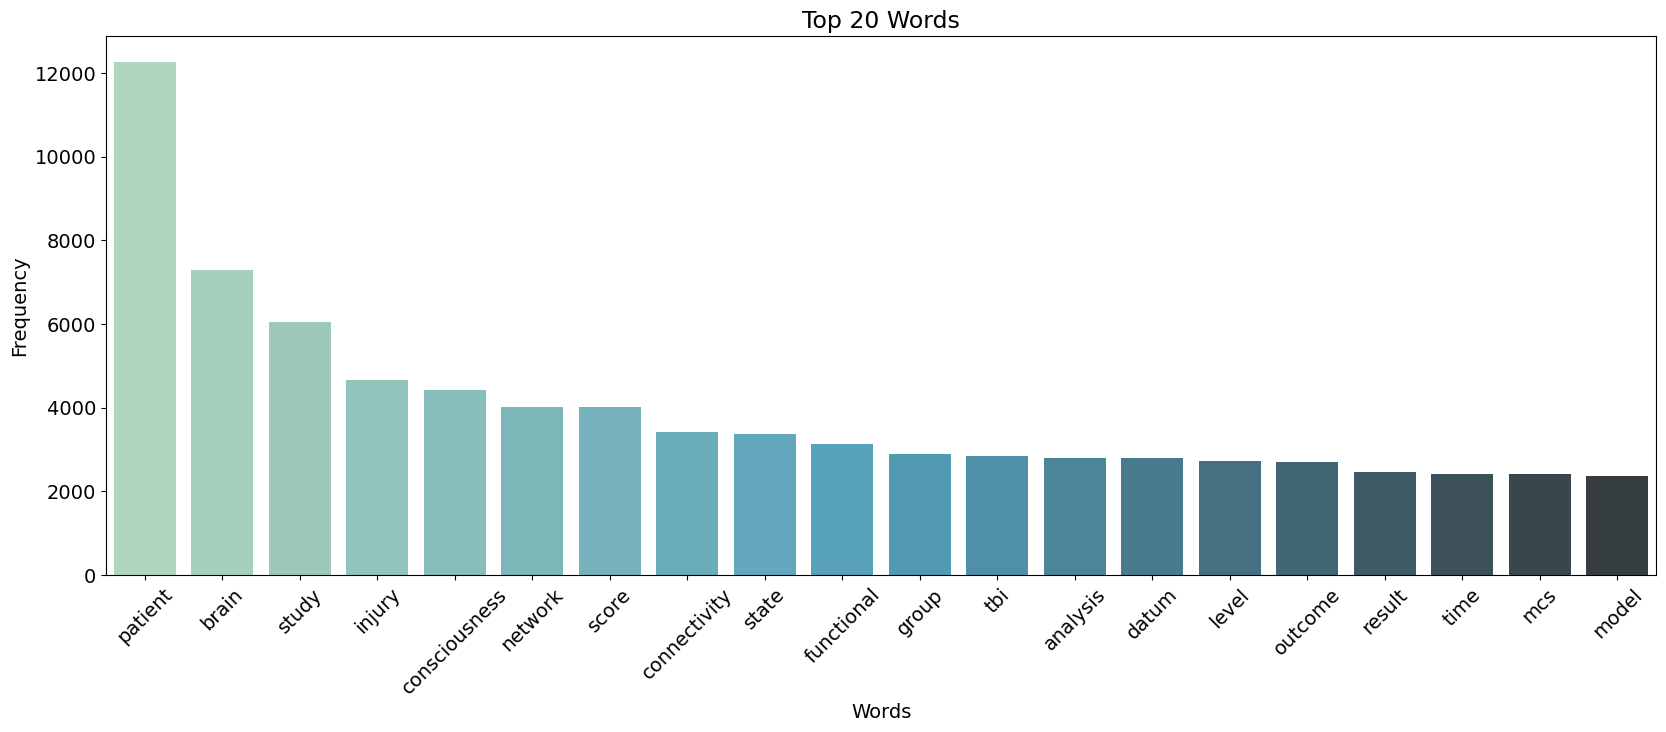

In [15]:
import seaborn as sns

# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)

plt.show()

In [16]:
# Get the number of unique words after processing
num_unique_words = len(set(p_text))
num_unique_words

100321

In [17]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# create a dataframe with the text data
df['string_text'] = df["processed_text"].apply(lambda x: ' '.join(x))


df.head()

# create the TfidfVectorizer object
vectorizer = TfidfVectorizer()

# fit the vectorizer to the data and transform the data
tfidf_scores = vectorizer.fit_transform(df['string_text'])

# get the feature names
feature_names = vectorizer.get_feature_names()

# create a dataframe with the tf-idf scores
tfidf_df = pd.DataFrame(tfidf_scores.toarray(), columns=feature_names)

In [19]:
# calculate the mean tf-idf value for each word across the corpus
mean_tfidf = tfidf_df.mean()

# sort the mean tf-idf values in descending order
mean_tfidf = mean_tfidf.sort_values(ascending=False)

# view the top 10 most important words
print(mean_tfidf.head(10))

patient          0.110076
brain            0.054566
injury           0.048847
study            0.047524
score            0.044167
connectivity     0.042472
mcs              0.041041
network          0.040386
consciousness    0.038620
gcs              0.037620
dtype: float64


In [20]:
dict_path = "/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Dictionaries/aalbi_dictionary.txt"
dictionary = []
dictionary = functions.os_level.makedict(dict_path)
dictionary

['precentral_gyrus',
 'frontal_sup',
 'frontal_mid',
 'frontal_inf_oper',
 'frontal_inf_tri',
 'frontal_inf_orb',
 'rolandic_oper',
 'supp_motor_area',
 'olfactory_cortex',
 'frontal_sup_medial',
 'frontal_med_orb',
 'gyrus_rectus',
 'ofcmed',
 'ofcant',
 'ofcpost',
 'ofclat',
 'insular_cortex',
 'cingulate_ant',
 'cingulate_mid',
 'cingulate_post',
 'hippocampus',
 'parahippocampal',
 'amygdala',
 'calcarine',
 'cuneus',
 'lingual_gyrus',
 'occipital_sup',
 'occipital_mid',
 'occipital_inf',
 'fusiform',
 'postcentral',
 'parietal_sup',
 'parietal_inf',
 'supramarginal',
 'angular_gyrus',
 'precuneus',
 'paracentral_lobule',
 'caudate',
 'putamen',
 'pallidum',
 'thalamus',
 'heschl',
 'temporal_sup',
 'temporal_pole_sup',
 'temporal_mid',
 'temporal_pole_mid',
 'temporal_inf',
 'cerebellum_crus',
 'cerebellum_aal',
 'vermis']

In [25]:
# create a list
my_list = dictionary

# create a set of items to remove from the list
remove_set = set(['gyrus_rectus', 'angular_gyrus', 'frontal_inf_orb', 'ofcant', 'frontal_sup_medial', 'temporal_pole_mid', 'cerebellum_crus', 'ofcmed', 'precentral_gyrus', 'frontal_med_orb', 'olfactory_cortex', 'insular_cortex', 'lingual_gyrus'])

# convert the list to a set and use the difference() method to remove the items
my_list = list(set(my_list).difference(remove_set))

# view the resulting list
print(my_list)

['occipital_inf', 'cingulate_ant', 'hippocampus', 'precuneus', 'ofclat', 'temporal_pole_sup', 'cingulate_mid', 'frontal_inf_tri', 'ofcpost', 'thalamus', 'fusiform', 'paracentral_lobule', 'pallidum', 'frontal_inf_oper', 'parietal_inf', 'temporal_sup', 'temporal_inf', 'frontal_mid', 'temporal_mid', 'supp_motor_area', 'parahippocampal', 'cuneus', 'vermis', 'occipital_mid', 'frontal_sup', 'amygdala', 'occipital_sup', 'postcentral', 'putamen', 'parietal_sup', 'calcarine', 'heschl', 'cingulate_post', 'supramarginal', 'rolandic_oper', 'caudate', 'cerebellum_aal']


In [26]:
# create a list of the words to find the mean tf-idf values for
words = my_list

# calculate the mean tf-idf value for each word in the list
mean2_tfidf = tfidf_df[words].mean()

# sort the mean tf-idf values in descending order
mean2_tfidf = mean2_tfidf.sort_values(ascending=False)

# view the top 10 most important words
print(mean2_tfidf.head(10))

thalamus          0.008453
precuneus         0.002875
amygdala          0.002809
caudate           0.002093
cingulate_post    0.002029
pallidum          0.001962
cerebellum_aal    0.001877
frontal_sup       0.001821
hippocampus       0.001707
cingulate_ant     0.001687
dtype: float64


## 3.4 - Full Texts Non-NMF Corpus

In [1]:
import functions

In [2]:
functions.outputs.make_csv("/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Assets/FullTexts_NON_TM", "txt")

In [3]:
#csv called corpus.csv saved to current working directory

In [4]:
import pandas as pd
import csv

df=pd.read_csv('corpus.csv', encoding = 'unicode_escape', encoding_errors = 'ignore', engine ='c')
df.head()

,name,text
0,10618329.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
1,10618330.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
2,10639523.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
3,10644795.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
4,10648373.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...


In [5]:
df['processed_text'] = df['text'].apply(functions.processing.preprocess)
df.head()

,name,text,processed_text
0,10618329.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[diagnosis, carotid, sinus, hypersensitivity, ..."
1,10618330.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[clinical, feature, adenosine, sensitive, sync..."
2,10639523.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[job, nameeditorialsrole, atrial, septostomy, ..."
3,10644795.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[short, reportfactor, ameliorate, aggravate, s..."
4,10648373.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[cerebral, blood, flow, vasovagal, syncopeindu..."


In [6]:
df["word_count"] = df["processed_text"].apply(lambda x: len(x))
#add in a line to remove 0 wc texts
df = df[~(df.word_count == 0)]


df.head()

,name,text,processed_text,word_count
0,10618329.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[diagnosis, carotid, sinus, hypersensitivity, ...",742
1,10618330.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[clinical, feature, adenosine, sensitive, sync...",2027
2,10639523.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[job, nameeditorialsrole, atrial, septostomy, ...",1062
3,10644795.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[short, reportfactor, ameliorate, aggravate, s...",1022
4,10648373.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[cerebral, blood, flow, vasovagal, syncopeindu...",1918


In [7]:
# Descriptive statistics for word count
df['word_count'].describe()
#95%CI Calculated: 

count     3216.00000
mean      1932.31592
std       1425.32716
min          5.00000
25%        869.00000
50%       1685.50000
75%       2654.00000
max      14622.00000
Name: word_count, dtype: float64

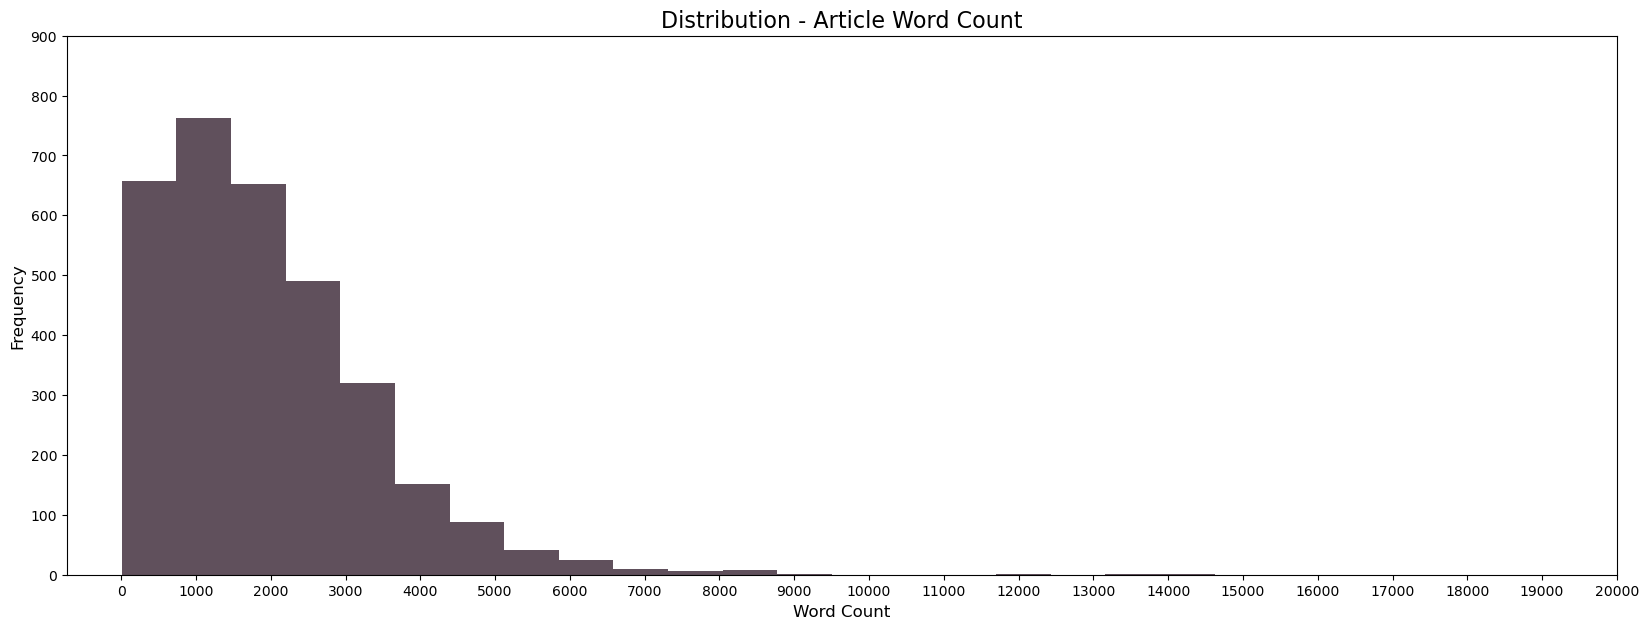

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Plot a hist of the word counts
fig = plt.figure(figsize=(20,7))

plt.hist(
    df['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 1000, 100))
plt.xticks(np.arange(0, 21000, 1000))

file_name = 'hist'

plt.show()

In [9]:
from collections import Counter

# Get the top 20 most common words among all the articles
p_text = df['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,patient,91760
1,study,39583
2,brain,29579
3,group,21419
4,death,20165
5,case,18915
6,clinical,18839
7,syncope,18309
8,test,16898
9,show,16788


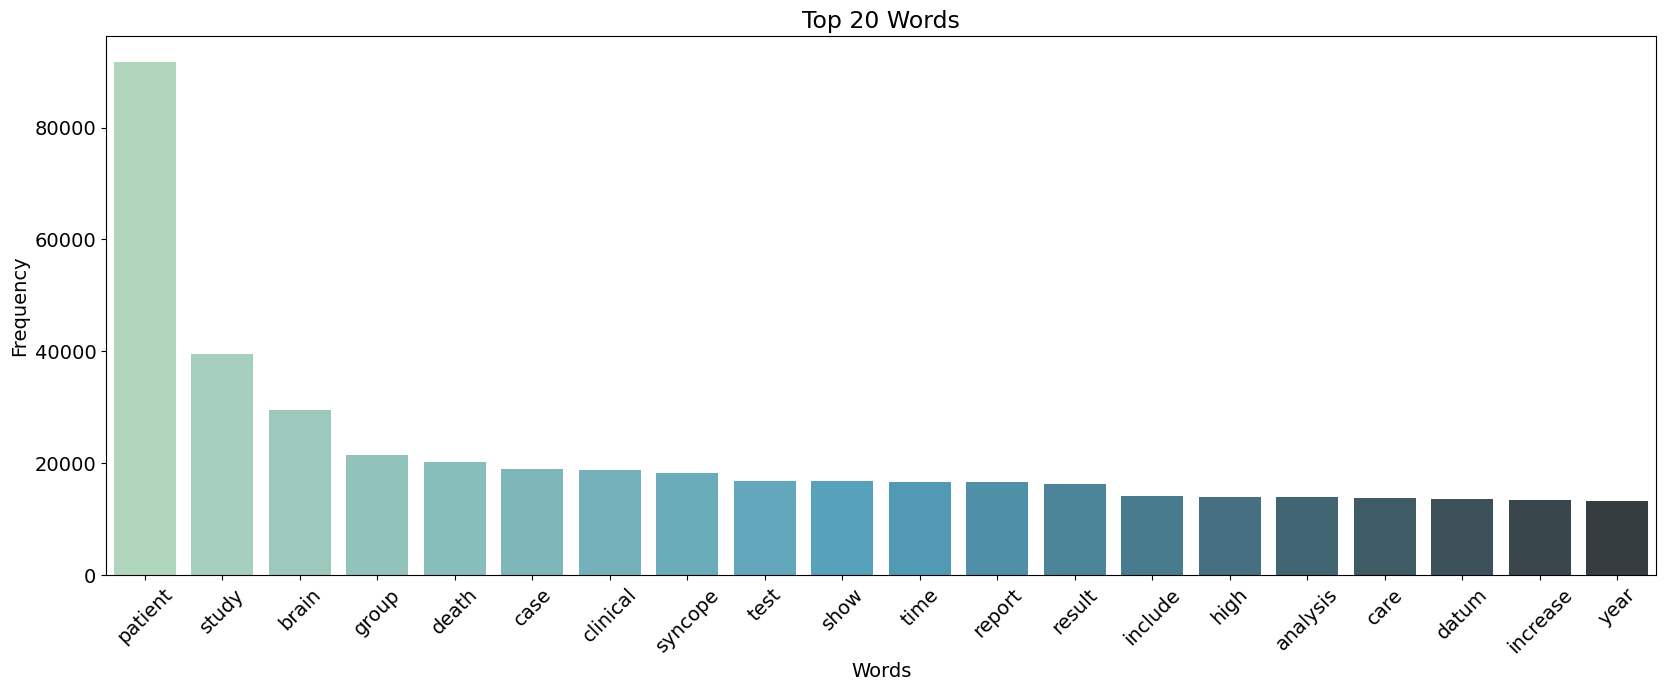

In [10]:
import seaborn as sns

# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)

plt.show()

In [11]:
# Get the number of unique words after processing
num_unique_words = len(set(p_text))
num_unique_words

588412

In [12]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# create a dataframe with the text data
df['string_text'] = df["processed_text"].apply(lambda x: ' '.join(x))


df.head()

# create the TfidfVectorizer object
vectorizer = TfidfVectorizer()

# fit the vectorizer to the data and transform the data
tfidf_scores = vectorizer.fit_transform(df['string_text'])

# get the feature names
feature_names = vectorizer.get_feature_names()

# create a dataframe with the tf-idf scores
tfidf_df = pd.DataFrame(tfidf_scores.toarray(), columns=feature_names)

In [14]:
# calculate the mean tf-idf value for each word across the corpus
mean_tfidf = tfidf_df.mean()

# sort the mean tf-idf values in descending order
mean_tfidf = mean_tfidf.sort_values(ascending=False)

# view the top 10 most important words
print(mean_tfidf.head(10))

patient     0.069819
syncope     0.037777
brain       0.030063
study       0.028259
death       0.026166
case        0.019316
group       0.017598
clinical    0.016094
test        0.015789
care        0.015710
dtype: float64


In [15]:
dict_path = "/Users/manojarachige/Library/CloudStorage/Dropbox/Mac/Documents/Coding/Projects/BMedScDOC2021/BMedScDOC_2023/Dictionaries/aalbi_dictionary.txt"
dictionary = []
dictionary = functions.os_level.makedict(dict_path)
dictionary

['precentral_gyrus',
 'frontal_sup',
 'frontal_mid',
 'frontal_inf_oper',
 'frontal_inf_tri',
 'frontal_inf_orb',
 'rolandic_oper',
 'supp_motor_area',
 'olfactory_cortex',
 'frontal_sup_medial',
 'frontal_med_orb',
 'gyrus_rectus',
 'ofcmed',
 'ofcant',
 'ofcpost',
 'ofclat',
 'insular_cortex',
 'cingulate_ant',
 'cingulate_mid',
 'cingulate_post',
 'hippocampus',
 'parahippocampal',
 'amygdala',
 'calcarine',
 'cuneus',
 'lingual_gyrus',
 'occipital_sup',
 'occipital_mid',
 'occipital_inf',
 'fusiform',
 'postcentral',
 'parietal_sup',
 'parietal_inf',
 'supramarginal',
 'angular_gyrus',
 'precuneus',
 'paracentral_lobule',
 'caudate',
 'putamen',
 'pallidum',
 'thalamus',
 'heschl',
 'temporal_sup',
 'temporal_pole_sup',
 'temporal_mid',
 'temporal_pole_mid',
 'temporal_inf',
 'cerebellum_crus',
 'cerebellum_aal',
 'vermis']

In [20]:
# create a list
my_list = dictionary

# create a set of items to remove from the list
remove_set = set(['gyrus_rectus', 'frontal_inf_orb', 'lingual_gyrus', 'cingulate_mid', 'frontal_med_orb', 'temporal_pole_mid', 'cerebellum_crus', 'precentral_gyrus', 'frontal_sup_medial', 'olfactory_cortex', 'ofcpost', 'insular_cortex', 'angular_gyrus'])

# convert the list to a set and use the difference() method to remove the items
my_list = list(set(my_list).difference(remove_set))

# view the resulting list
print(my_list)

['hippocampus', 'cingulate_post', 'supp_motor_area', 'cerebellum_aal', 'vermis', 'temporal_mid', 'parahippocampal', 'temporal_pole_sup', 'supramarginal', 'thalamus', 'occipital_inf', 'parietal_inf', 'parietal_sup', 'frontal_inf_oper', 'fusiform', 'frontal_sup', 'ofclat', 'caudate', 'cingulate_ant', 'pallidum', 'ofcant', 'cuneus', 'frontal_inf_tri', 'heschl', 'temporal_sup', 'postcentral', 'paracentral_lobule', 'occipital_sup', 'putamen', 'rolandic_oper', 'calcarine', 'amygdala', 'temporal_inf', 'ofcmed', 'occipital_mid', 'frontal_mid', 'precuneus']


In [21]:
# create a list of the words to find the mean tf-idf values for
words = my_list

# calculate the mean tf-idf value for each word in the list
mean2_tfidf = tfidf_df[words].mean()

# sort the mean tf-idf values in descending order
mean2_tfidf = mean2_tfidf.sort_values(ascending=False)

# view the top 10 most important words
print(mean2_tfidf.head(10))

thalamus           0.002343
hippocampus        0.001328
cerebellum_aal     0.001280
caudate            0.000746
amygdala           0.000643
precuneus          0.000463
pallidum           0.000282
parahippocampal    0.000254
cingulate_ant      0.000246
vermis             0.000235
dtype: float64
